# Análise do modelo lstm para abordagem seq2seq 

In [1]:
# imports
%matplotlib inline
import pandas
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import datetime
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from estatisticas_time_serie import generate_datasets,general_forecasting,smooth,create_dataset_seq2seq, train_seqtoseq_lstm,reject_outliers

from sklearn.metrics import  mean_squared_error
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sensores = [
    '30min/690a-vila-aurea-4meses.csv',
    '30min/690g-pressao-vila-aurea-4meses.csv',
    '30min/735g-pressaomedia-vila-aurea-4meses.csv',
    '30min/781a-vazao-aeroporto-4meses.csv',
    '30min/781g-pressao_entrada-aeroporto-4meses.csv',
    '30min/801g-pressao_alta-reno-4meses.csv',
    '30min/830g-pressao_baixa-santa-izabel-4meses.csv',
    '30min/831g-pressao_alta-santa-izabel-4meses.csv',
    '30min/450a-vazao-santa-izabel-4meses.csv',
    '30min/450g-pressao_entrada-santa-izabel-4meses.csv',
    '30min/485b-vazao-reno-4meses.csv',
    '30min/485g-pressao_entrada-reno-4meses.csv',
    '30min/525g-pressao_baixa-reno-4meses.csv',
    '30min/573g-pressao_alta-aeroporto-4meses.csv',
    '30min/589g-pressao_alta-andreazza-4meses.csv',
    '30min/605g-pressaoalta-vila-aurea-4meses.csv',
    '30min/631g-pressao_ponto_critico-andreazza-4meses.csv',
    '30min/635g-pressao_ponto_critico-aeroporto-4meses.csv',
    '30min/678b-vazao-andreazza-4meses.csv',
    '30min/678g-pressao_entrada-andreazza-4meses.csv'
]


dataframes=[]

for item in sensores:
    # lendo csv
    dataframe = pandas.read_csv(item, engine='python', skipfooter=3)
    data_matrix = dataframe.as_matrix()
    # removendo valores nulos
    data_matrix = data_matrix[:,2:]
    data_convolution = np.array(data_matrix).ravel()

    newV=[]
    for idx,val in enumerate(data_convolution):
        # checking
        if not data_convolution[idx] == 'null' and not np.isnan(float(data_convolution[idx])) and float(data_convolution[idx]) > 0.0: 
            newV.append(float(data_convolution[idx]))

    newV = np.array(newV)
    newV = reject_outliers(newV,m=2)
        
    dataframes.append(newV)


('mean_squared_error  LSTM = ', 25.722873490267478)
Epoch 1/10
4999/4999 [==============================] - 2s - loss: 0.1204     
Epoch 2/10
4999/4999 [==============================] - 0s - loss: 0.0350     
Epoch 3/10
4999/4999 [==============================] - 0s - loss: 0.0144     
Epoch 4/10
4999/4999 [==============================] - 0s - loss: 0.0095     
Epoch 5/10
4999/4999 [==============================] - 0s - loss: 0.0079     
Epoch 6/10
4999/4999 [==============================] - 0s - loss: 0.0072     
Epoch 7/10
4999/4999 [==============================] - 0s - loss: 0.0067     
Epoch 8/10
4999/4999 [==============================] - 0s - loss: 0.0064     
Epoch 9/10
4999/4999 [==============================] - 0s - loss: 0.0060     
Epoch 10/10
4999/4999 [==============================] - 0s - loss: 0.0058     
lstm
('mean_squared_error  LSTM = ', 22.814516221120002)


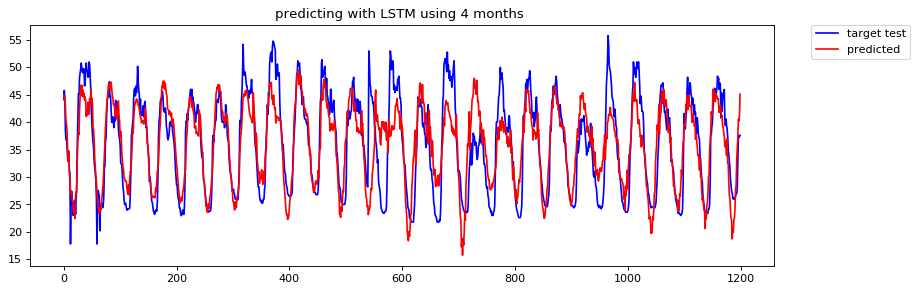

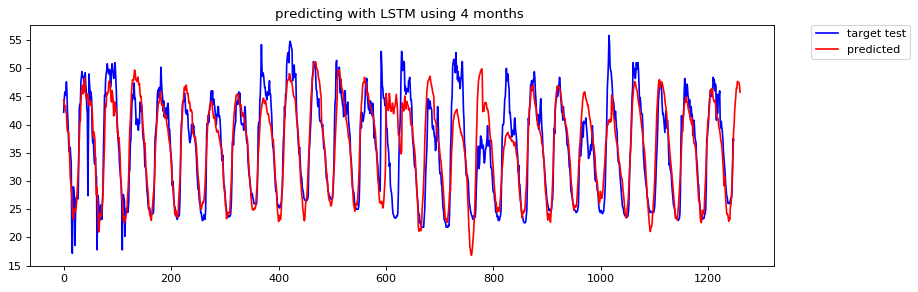

('mean_squared_error  LSTM = ', 2.8172140535462251)
Epoch 1/10
5025/5025 [==============================] - 2s - loss: 0.1675     
Epoch 2/10
5025/5025 [==============================] - 0s - loss: 0.0315     
Epoch 3/10
5025/5025 [==============================] - 0s - loss: 0.0218     
Epoch 4/10
5025/5025 [==============================] - 0s - loss: 0.0169     
Epoch 5/10
5025/5025 [==============================] - 0s - loss: 0.0144     
Epoch 6/10
5025/5025 [==============================] - 0s - loss: 0.0130     
Epoch 7/10
5025/5025 [==============================] - 0s - loss: 0.0120     
Epoch 8/10
5025/5025 [==============================] - 0s - loss: 0.0112     
Epoch 9/10
5025/5025 [==============================] - 0s - loss: 0.0106     
Epoch 10/10
5025/5025 [==============================] - 0s - loss: 0.0100     
lstm
('mean_squared_error  LSTM = ', 3.3392768906681076)


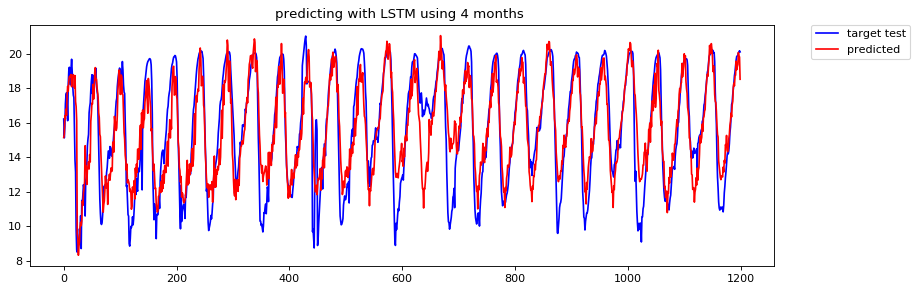

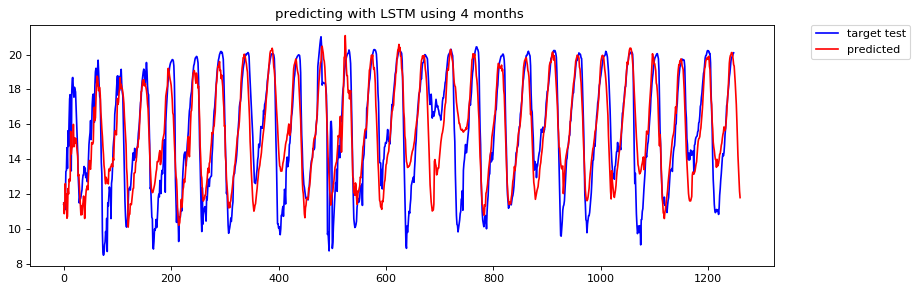

('mean_squared_error  LSTM = ', 11.184860009493841)
Epoch 1/10
6295/6295 [==============================] - 2s - loss: 0.0944     
Epoch 2/10
6295/6295 [==============================] - 0s - loss: 0.0295     
Epoch 3/10
6295/6295 [==============================] - 0s - loss: 0.0200     
Epoch 4/10
6295/6295 [==============================] - 0s - loss: 0.0138     
Epoch 5/10
6295/6295 [==============================] - 0s - loss: 0.0108     
Epoch 6/10
6295/6295 [==============================] - 0s - loss: 0.0093     
Epoch 7/10
6295/6295 [==============================] - 0s - loss: 0.0083     
Epoch 8/10
6295/6295 [==============================] - 0s - loss: 0.0075     
Epoch 9/10
6295/6295 [==============================] - 0s - loss: 0.0070     
Epoch 10/10
6295/6295 [==============================] - 0s - loss: 0.0066     
lstm
('mean_squared_error  LSTM = ', 10.56428524514082)


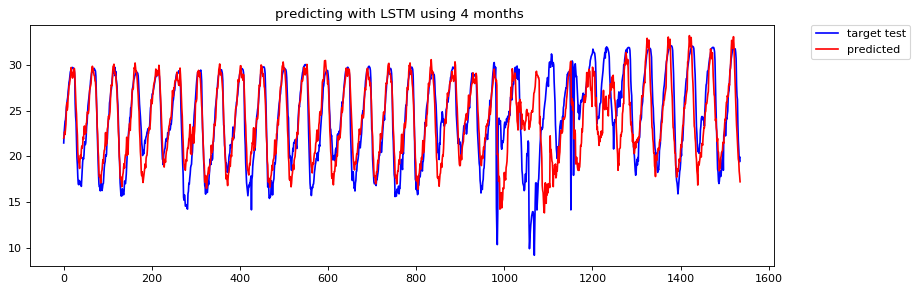

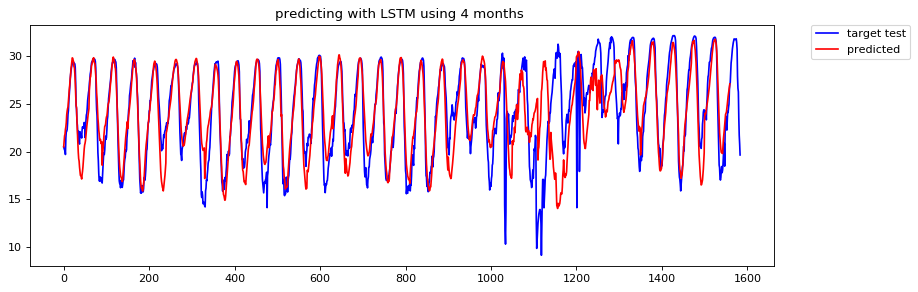

('mean_squared_error  LSTM = ', 1.9963551399210453)
Epoch 1/10
6025/6025 [==============================] - 2s - loss: 0.1674     
Epoch 2/10
6025/6025 [==============================] - 0s - loss: 0.0382     
Epoch 3/10
6025/6025 [==============================] - 0s - loss: 0.0281     
Epoch 4/10
6025/6025 [==============================] - 0s - loss: 0.0221     
Epoch 5/10
6025/6025 [==============================] - 0s - loss: 0.0185     
Epoch 6/10
6025/6025 [==============================] - 0s - loss: 0.0165     
Epoch 7/10
6025/6025 [==============================] - 0s - loss: 0.0154     
Epoch 8/10
6025/6025 [==============================] - 0s - loss: 0.0144     
Epoch 9/10
6025/6025 [==============================] - 0s - loss: 0.0136     
Epoch 10/10
6025/6025 [==============================] - 0s - loss: 0.0130     
lstm
('mean_squared_error  LSTM = ', 2.5888521120929604)


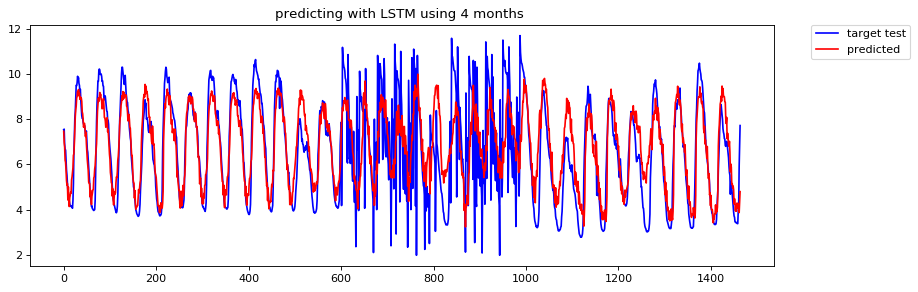

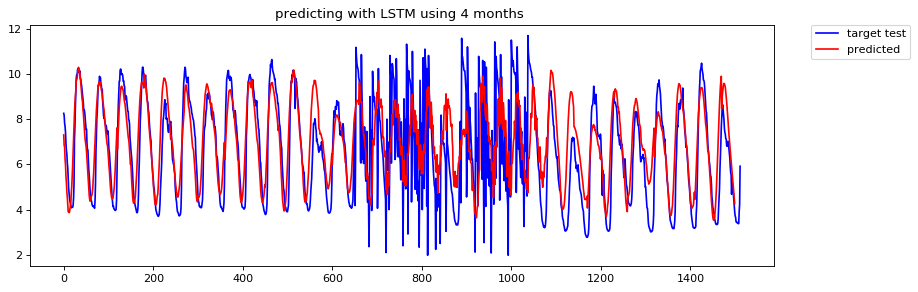

('mean_squared_error  LSTM = ', 3.4543312953759786)
Epoch 1/10
5963/5963 [==============================] - 2s - loss: 0.1151     
Epoch 2/10
5963/5963 [==============================] - 0s - loss: 0.0092     
Epoch 3/10
5963/5963 [==============================] - 0s - loss: 0.0086     
Epoch 4/10
5963/5963 [==============================] - 0s - loss: 0.0083     
Epoch 5/10
5963/5963 [==============================] - 0s - loss: 0.0081     - ETA: 0s - loss: 0.00
Epoch 6/10
5963/5963 [==============================] - 0s - loss: 0.0078     
Epoch 7/10
5963/5963 [==============================] - 0s - loss: 0.0076     
Epoch 8/10
5963/5963 [==============================] - 0s - loss: 0.0074     
Epoch 9/10
5963/5963 [==============================] - 0s - loss: 0.0073     
Epoch 10/10
5963/5963 [==============================] - 0s - loss: 0.0072     
lstm
('mean_squared_error  LSTM = ', 3.0452286087737317)


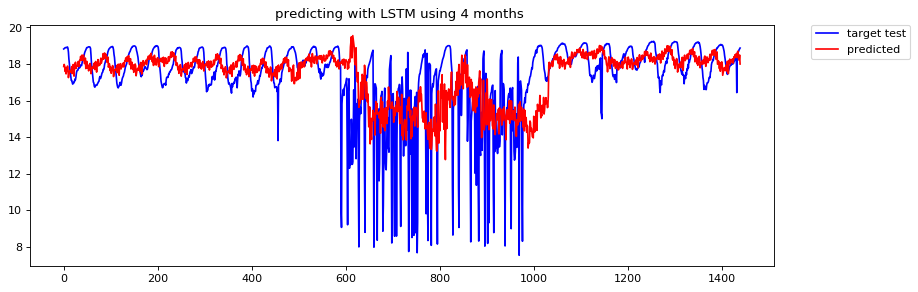

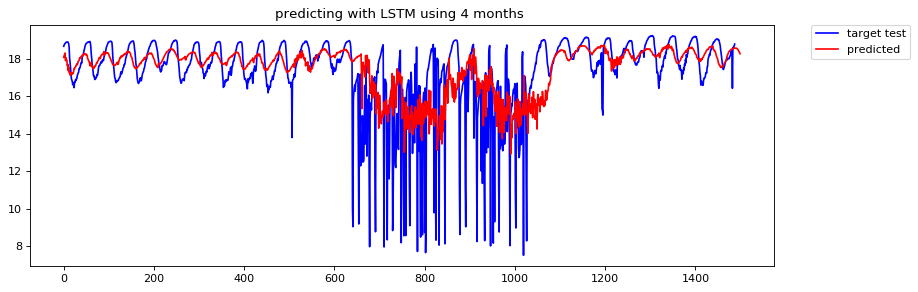

('mean_squared_error  LSTM = ', 15.004299682424842)
Epoch 1/10
3570/3570 [==============================] - 2s - loss: 0.1553     
Epoch 2/10
3570/3570 [==============================] - 0s - loss: 0.0424     
Epoch 3/10
3570/3570 [==============================] - 0s - loss: 0.0286     
Epoch 4/10
3570/3570 [==============================] - 0s - loss: 0.0192     
Epoch 5/10
3570/3570 [==============================] - 0s - loss: 0.0142     
Epoch 6/10
3570/3570 [==============================] - 0s - loss: 0.0123     
Epoch 7/10
3570/3570 [==============================] - 0s - loss: 0.0114     
Epoch 8/10
3570/3570 [==============================] - 0s - loss: 0.0106     
Epoch 9/10
3570/3570 [==============================] - 0s - loss: 0.0098     
Epoch 10/10
3570/3570 [==============================] - 0s - loss: 0.0091     
lstm
('mean_squared_error  LSTM = ', 19.563658609454436)


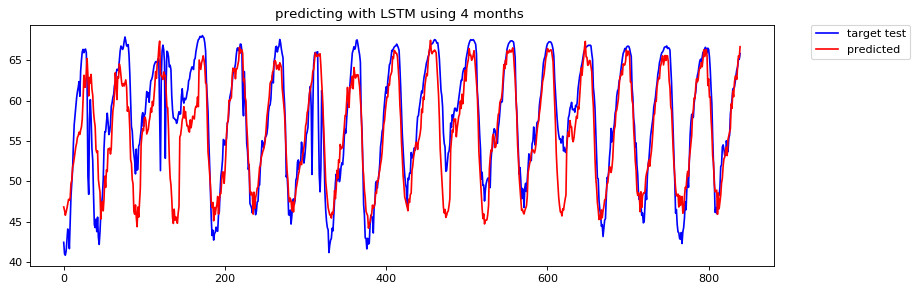

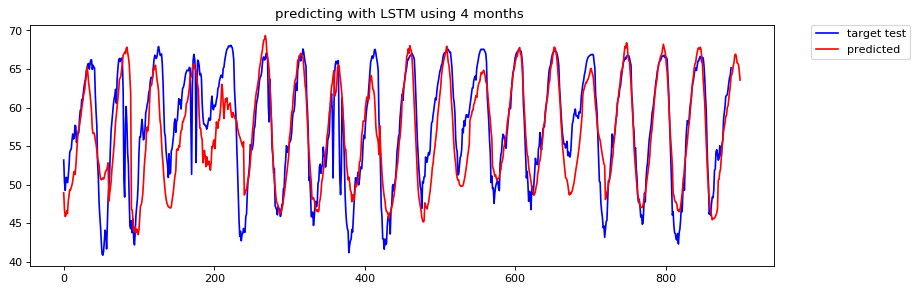

('mean_squared_error  LSTM = ', 2.9443333820302082)
Epoch 1/10
2243/2243 [==============================] - 2s - loss: 0.3926     
Epoch 2/10
2243/2243 [==============================] - 0s - loss: 0.1575     
Epoch 3/10
2243/2243 [==============================] - 0s - loss: 0.0689     
Epoch 4/10
2243/2243 [==============================] - 0s - loss: 0.0478     
Epoch 5/10
2243/2243 [==============================] - 0s - loss: 0.0364     
Epoch 6/10
2243/2243 [==============================] - 0s - loss: 0.0263     
Epoch 7/10
2243/2243 [==============================] - 0s - loss: 0.0191     
Epoch 8/10
2243/2243 [==============================] - 0s - loss: 0.0153     
Epoch 9/10
2243/2243 [==============================] - 0s - loss: 0.0135     
Epoch 10/10
2243/2243 [==============================] - 0s - loss: 0.0125     
lstm
('mean_squared_error  LSTM = ', 2.5335820850229451)


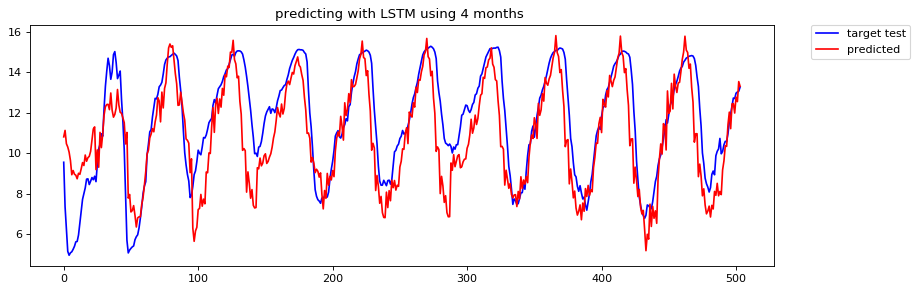

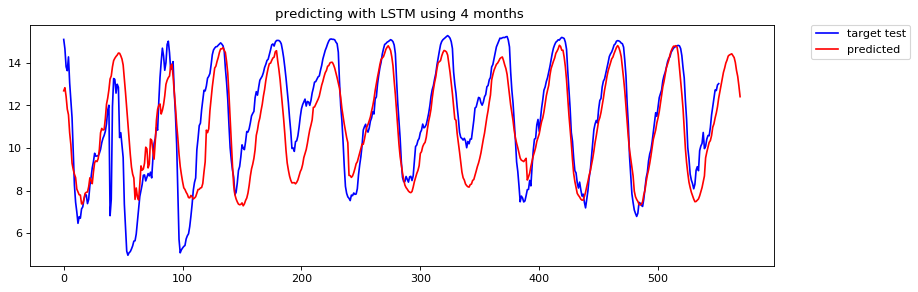

('mean_squared_error  LSTM = ', 31.671209666946442)
Epoch 1/10
2234/2234 [==============================] - 2s - loss: 0.1707     
Epoch 2/10
2234/2234 [==============================] - 0s - loss: 0.0469     
Epoch 3/10
2234/2234 [==============================] - 0s - loss: 0.0292     
Epoch 4/10
2234/2234 [==============================] - 0s - loss: 0.0193     
Epoch 5/10
2234/2234 [==============================] - 0s - loss: 0.0142     
Epoch 6/10
2234/2234 [==============================] - 0s - loss: 0.0120     
Epoch 7/10
2234/2234 [==============================] - 0s - loss: 0.0110     
Epoch 8/10
2234/2234 [==============================] - 0s - loss: 0.0101     
Epoch 9/10
2234/2234 [==============================] - 0s - loss: 0.0094     
Epoch 10/10
2234/2234 [==============================] - 0s - loss: 0.0088     
lstm
('mean_squared_error  LSTM = ', 14.883932231904035)


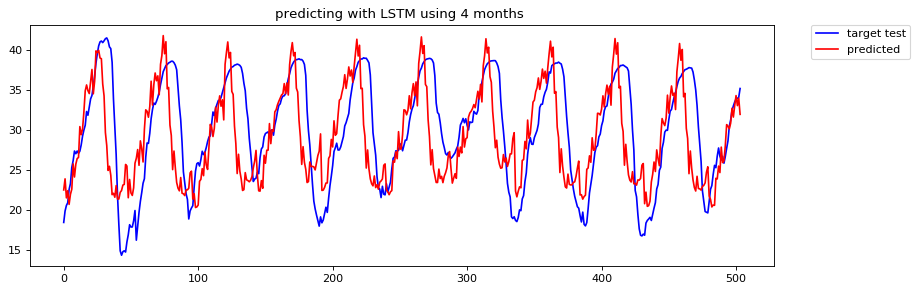

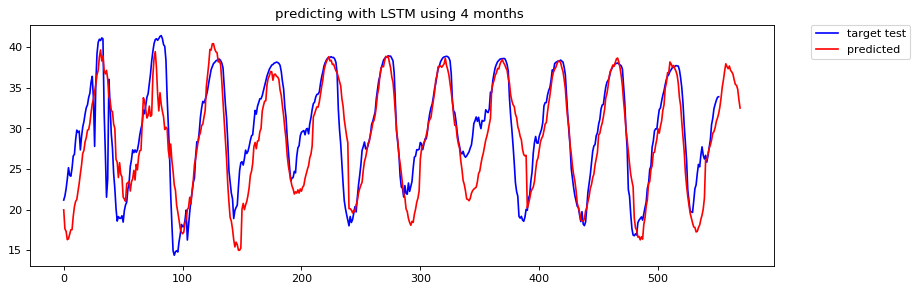

('mean_squared_error  LSTM = ', 161.5856249248863)
Epoch 1/10
3272/3272 [==============================] - 2s - loss: 0.0882     
Epoch 2/10
3272/3272 [==============================] - 0s - loss: 0.0295     
Epoch 3/10
3272/3272 [==============================] - 0s - loss: 0.0211     
Epoch 4/10
3272/3272 [==============================] - 0s - loss: 0.0151     
Epoch 5/10
3272/3272 [==============================] - 0s - loss: 0.0114     
Epoch 6/10
3272/3272 [==============================] - 0s - loss: 0.0096     
Epoch 7/10
3272/3272 [==============================] - 0s - loss: 0.0083     
Epoch 8/10
3272/3272 [==============================] - 0s - loss: 0.0074     
Epoch 9/10
3272/3272 [==============================] - 0s - loss: 0.0068     
Epoch 10/10
3272/3272 [==============================] - 0s - loss: 0.0064     
lstm
('mean_squared_error  LSTM = ', 157.9645880720586)


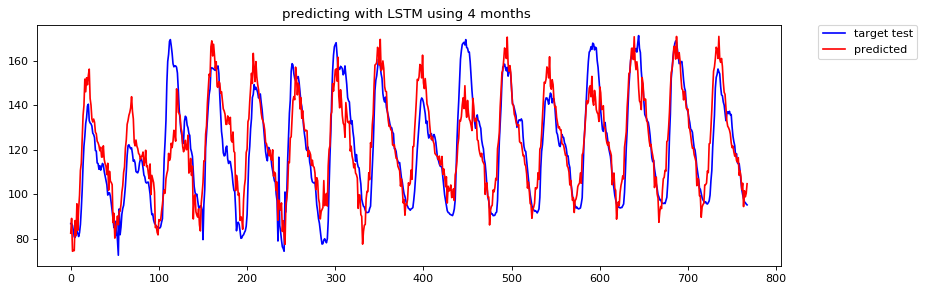

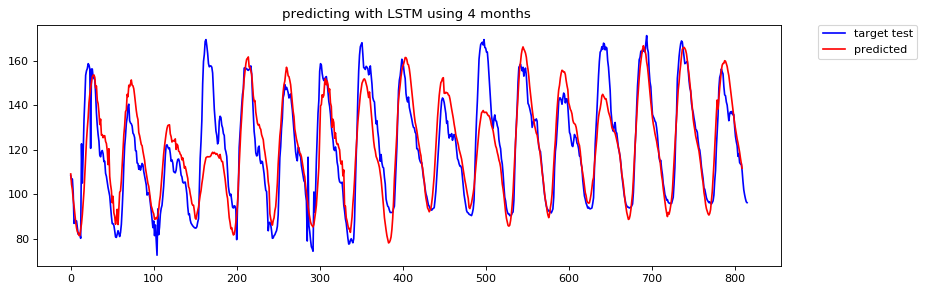

('mean_squared_error  LSTM = ', 3.1079577512826977)
Epoch 1/10
4351/4351 [==============================] - 2s - loss: 0.0910     
Epoch 2/10
4351/4351 [==============================] - 0s - loss: 0.0178     
Epoch 3/10
4351/4351 [==============================] - 0s - loss: 0.0102     
Epoch 4/10
4351/4351 [==============================] - 0s - loss: 0.0086     
Epoch 5/10
4351/4351 [==============================] - 0s - loss: 0.0081     
Epoch 6/10
4351/4351 [==============================] - 0s - loss: 0.0079     
Epoch 7/10
4351/4351 [==============================] - 0s - loss: 0.0076     
Epoch 8/10
4351/4351 [==============================] - 0s - loss: 0.0074     
Epoch 9/10
4351/4351 [==============================] - 0s - loss: 0.0071     
Epoch 10/10
4351/4351 [==============================] - 0s - loss: 0.0069     
lstm
('mean_squared_error  LSTM = ', 2.9754389837241466)


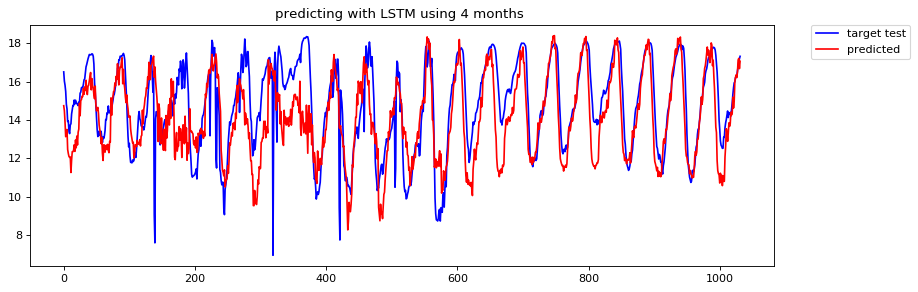

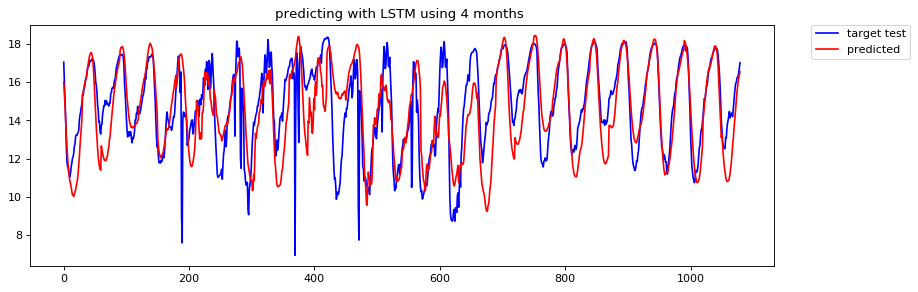

('mean_squared_error  LSTM = ', 37.794455655858499)
Epoch 1/10
4315/4315 [==============================] - 2s - loss: 0.1516     
Epoch 2/10
4315/4315 [==============================] - 0s - loss: 0.0262     
Epoch 3/10
4315/4315 [==============================] - 0s - loss: 0.0179     
Epoch 4/10
4315/4315 [==============================] - 0s - loss: 0.0141     
Epoch 5/10
4315/4315 [==============================] - 0s - loss: 0.0120     
Epoch 6/10
4315/4315 [==============================] - 0s - loss: 0.0105     
Epoch 7/10
4315/4315 [==============================] - 0s - loss: 0.0093     
Epoch 8/10
4315/4315 [==============================] - 0s - loss: 0.0084     
Epoch 9/10
4315/4315 [==============================] - 0s - loss: 0.0078     
Epoch 10/10
4315/4315 [==============================] - 0s - loss: 0.0073     
lstm
('mean_squared_error  LSTM = ', 34.394504056199438)


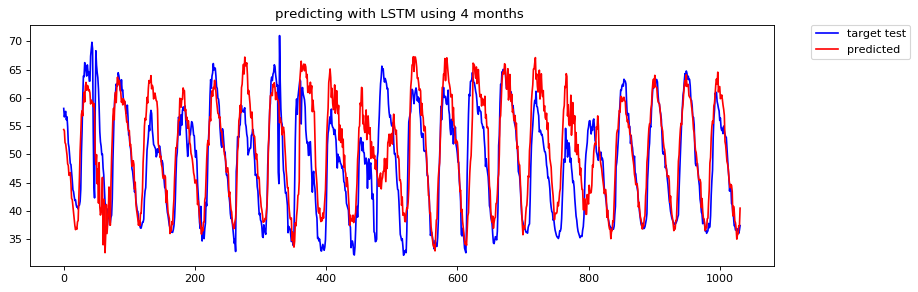

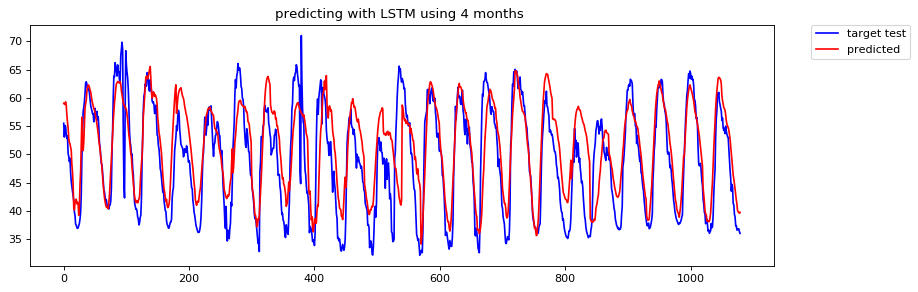

('mean_squared_error  LSTM = ', 7.0057762336902112)
Epoch 1/10
4162/4162 [==============================] - 2s - loss: 0.1495     
Epoch 2/10
4162/4162 [==============================] - 0s - loss: 0.0174     
Epoch 3/10
4162/4162 [==============================] - 0s - loss: 0.0149     
Epoch 4/10
4162/4162 [==============================] - 0s - loss: 0.0137     
Epoch 5/10
4162/4162 [==============================] - 0s - loss: 0.0126     
Epoch 6/10
4162/4162 [==============================] - 0s - loss: 0.0116     
Epoch 7/10
4162/4162 [==============================] - 0s - loss: 0.0108     
Epoch 8/10
4162/4162 [==============================] - 0s - loss: 0.0100     
Epoch 9/10
4162/4162 [==============================] - 0s - loss: 0.0094     
Epoch 10/10
4162/4162 [==============================] - 0s - loss: 0.0090     
lstm
('mean_squared_error  LSTM = ', 5.6023438695326107)


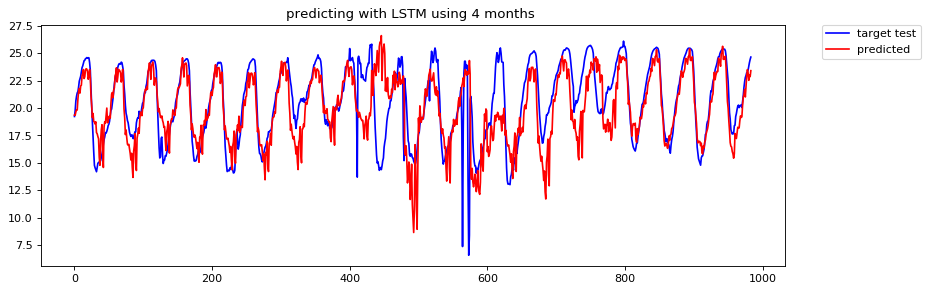

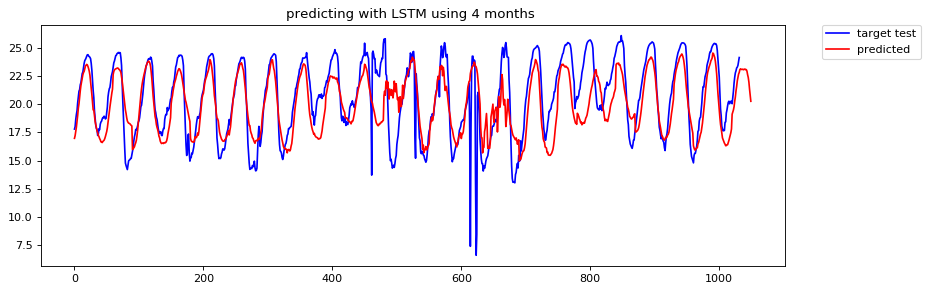

('mean_squared_error  LSTM = ', 17.361514206523776)
Epoch 1/10
4440/4440 [==============================] - 3s - loss: 0.1788     
Epoch 2/10
4440/4440 [==============================] - 0s - loss: 0.0460     
Epoch 3/10
4440/4440 [==============================] - 0s - loss: 0.0202     
Epoch 4/10
4440/4440 [==============================] - 0s - loss: 0.0139     
Epoch 5/10
4440/4440 [==============================] - 0s - loss: 0.0131     
Epoch 6/10
4440/4440 [==============================] - 0s - loss: 0.0125     
Epoch 7/10
4440/4440 [==============================] - 0s - loss: 0.0120     
Epoch 8/10
4440/4440 [==============================] - 0s - loss: 0.0115     
Epoch 9/10
4440/4440 [==============================] - 0s - loss: 0.0110     
Epoch 10/10
4440/4440 [==============================] - 0s - loss: 0.0106     
lstm
('mean_squared_error  LSTM = ', 13.095882503829952)


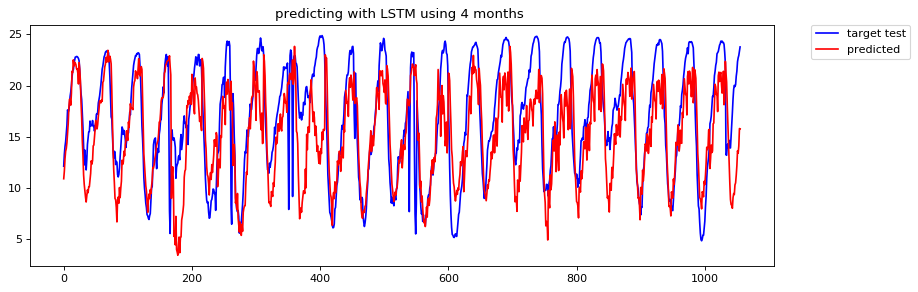

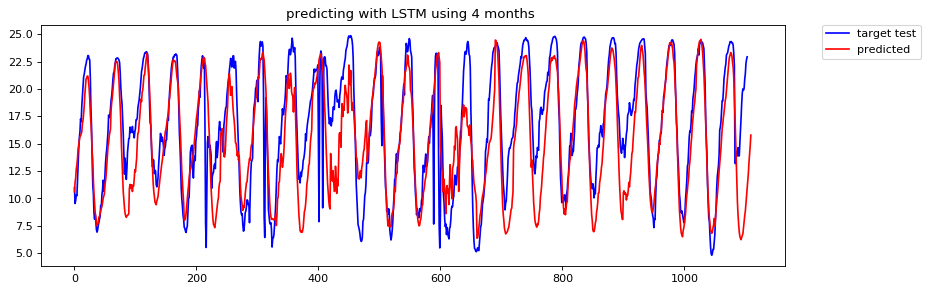

('mean_squared_error  LSTM = ', 27.648898749029396)
Epoch 1/10
5295/5295 [==============================] - 3s - loss: 0.1337     
Epoch 2/10
5295/5295 [==============================] - 0s - loss: 0.0299     
Epoch 3/10
5295/5295 [==============================] - 0s - loss: 0.0226     
Epoch 4/10
5295/5295 [==============================] - 0s - loss: 0.0177     
Epoch 5/10
5295/5295 [==============================] - 0s - loss: 0.0149     
Epoch 6/10
5295/5295 [==============================] - 0s - loss: 0.0134     
Epoch 7/10
5295/5295 [==============================] - 0s - loss: 0.0126     
Epoch 8/10
5295/5295 [==============================] - 0s - loss: 0.0119     - ETA: 0s - loss: 0.012
Epoch 9/10
5295/5295 [==============================] - 0s - loss: 0.0112     
Epoch 10/10
5295/5295 [==============================] - 0s - loss: 0.0106     
lstm
('mean_squared_error  LSTM = ', 29.37311898677628)


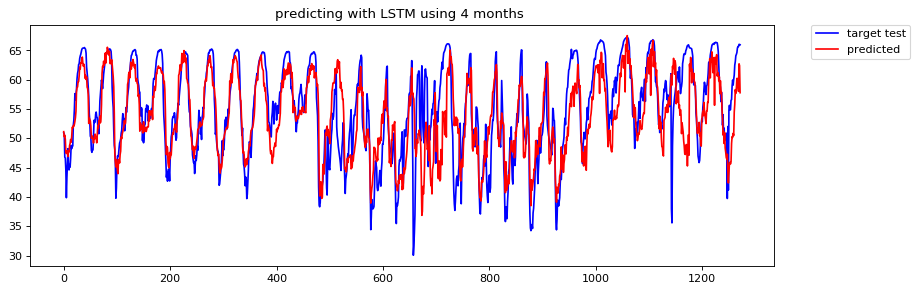

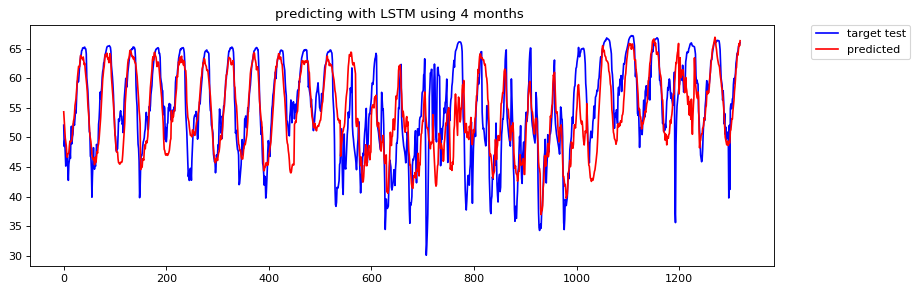

('mean_squared_error  LSTM = ', 14.893117843510497)
Epoch 1/10
5895/5895 [==============================] - 3s - loss: 0.0948     
Epoch 2/10
5895/5895 [==============================] - 0s - loss: 0.0219     
Epoch 3/10
5895/5895 [==============================] - 0s - loss: 0.0148     
Epoch 4/10
5895/5895 [==============================] - 0s - loss: 0.0129     
Epoch 5/10
5895/5895 [==============================] - 0s - loss: 0.0115     
Epoch 6/10
5895/5895 [==============================] - 0s - loss: 0.0103     
Epoch 7/10
5895/5895 [==============================] - 0s - loss: 0.0093     
Epoch 8/10
5895/5895 [==============================] - 0s - loss: 0.0084     
Epoch 9/10
5895/5895 [==============================] - 0s - loss: 0.0076     
Epoch 10/10
5895/5895 [==============================] - 0s - loss: 0.0069     
lstm
('mean_squared_error  LSTM = ', 16.414036899648675)


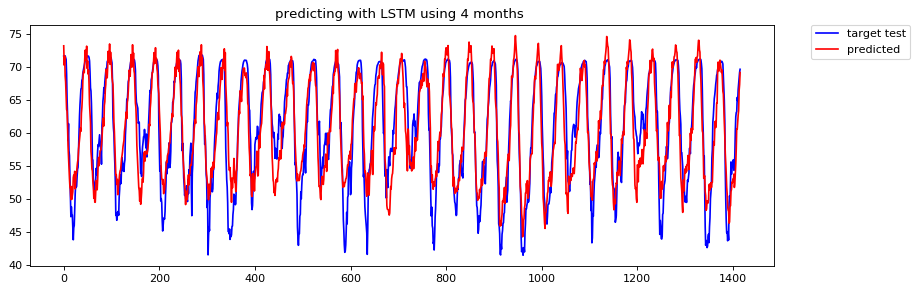

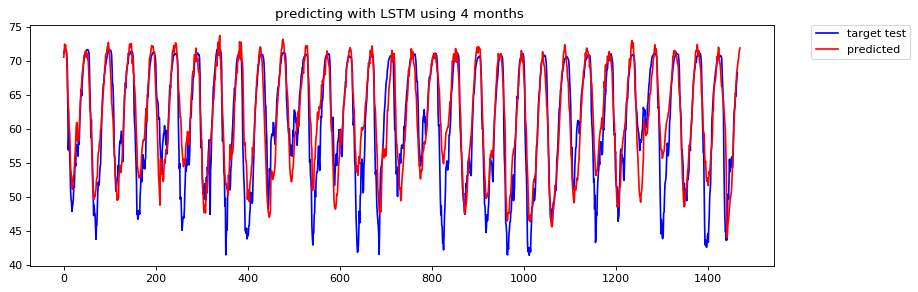

('mean_squared_error  LSTM = ', 8.4158044432786596)
Epoch 1/10
5327/5327 [==============================] - 3s - loss: 0.0835     
Epoch 2/10
5327/5327 [==============================] - 0s - loss: 0.0249     
Epoch 3/10
5327/5327 [==============================] - 0s - loss: 0.0172     
Epoch 4/10
5327/5327 [==============================] - 0s - loss: 0.0151     
Epoch 5/10
5327/5327 [==============================] - 0s - loss: 0.0136     
Epoch 6/10
5327/5327 [==============================] - 0s - loss: 0.0122     
Epoch 7/10
5327/5327 [==============================] - 0s - loss: 0.0110     
Epoch 8/10
5327/5327 [==============================] - 0s - loss: 0.0100     
Epoch 9/10
5327/5327 [==============================] - 0s - loss: 0.0092     
Epoch 10/10
5327/5327 [==============================] - 0s - loss: 0.0085     
lstm
('mean_squared_error  LSTM = ', 8.7456609522741431)


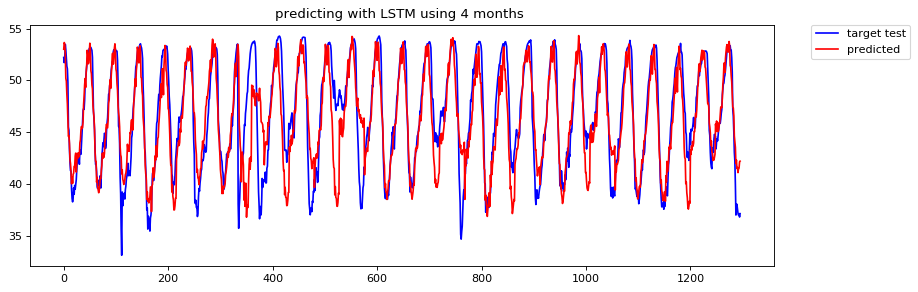

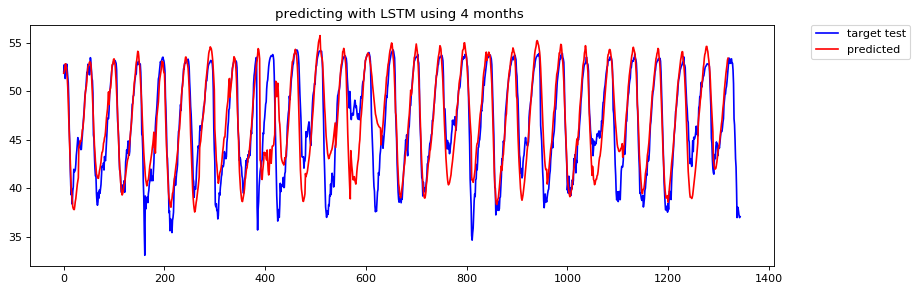

('mean_squared_error  LSTM = ', 10.837463008954149)
Epoch 1/10
6473/6473 [==============================] - 3s - loss: 0.1626     
Epoch 2/10
6473/6473 [==============================] - 0s - loss: 0.0294     
Epoch 3/10
6473/6473 [==============================] - 0s - loss: 0.0198     
Epoch 4/10
6473/6473 [==============================] - 0s - loss: 0.0142     
Epoch 5/10
6473/6473 [==============================] - 0s - loss: 0.0123     
Epoch 6/10
6473/6473 [==============================] - 0s - loss: 0.0111     
Epoch 7/10
6473/6473 [==============================] - 0s - loss: 0.0101     
Epoch 8/10
6473/6473 [==============================] - 0s - loss: 0.0092     
Epoch 9/10
6473/6473 [==============================] - 0s - loss: 0.0084     
Epoch 10/10
6473/6473 [==============================] - 0s - loss: 0.0077     
lstm
('mean_squared_error  LSTM = ', 11.186270492832076)


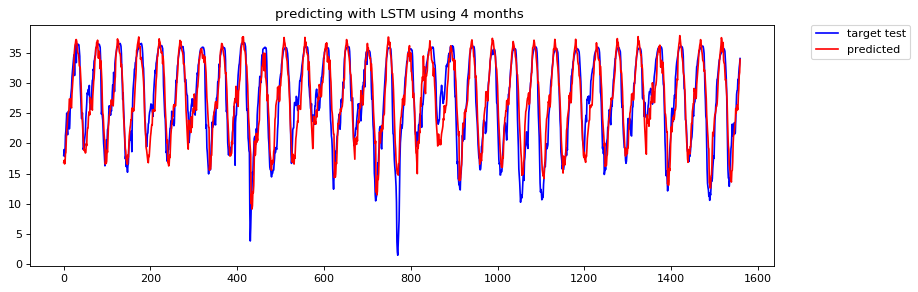

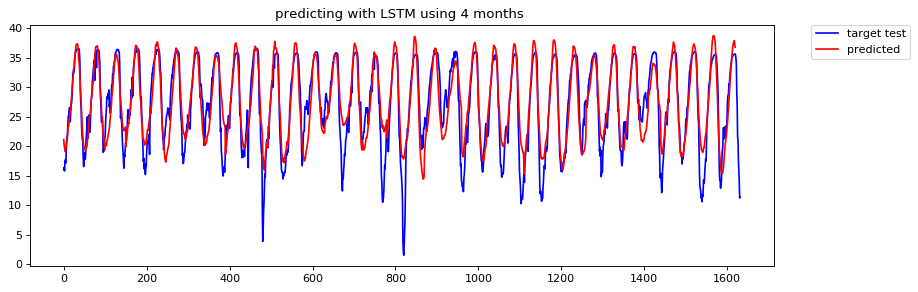

('mean_squared_error  LSTM = ', 4.9013819483651737)
Epoch 1/10
5851/5851 [==============================] - 3s - loss: 0.1921     
Epoch 2/10
5851/5851 [==============================] - 0s - loss: 0.0306     
Epoch 3/10
5851/5851 [==============================] - 0s - loss: 0.0268     
Epoch 4/10
5851/5851 [==============================] - 0s - loss: 0.0246     
Epoch 5/10
5851/5851 [==============================] - 0s - loss: 0.0229     
Epoch 6/10
5851/5851 [==============================] - 0s - loss: 0.0218     
Epoch 7/10
5851/5851 [==============================] - 0s - loss: 0.0208     
Epoch 8/10
5851/5851 [==============================] - 0s - loss: 0.0199     
Epoch 9/10
5851/5851 [==============================] - 0s - loss: 0.0191     
Epoch 10/10
5851/5851 [==============================] - 0s - loss: 0.0183     
lstm
('mean_squared_error  LSTM = ', 4.2277799048698812)


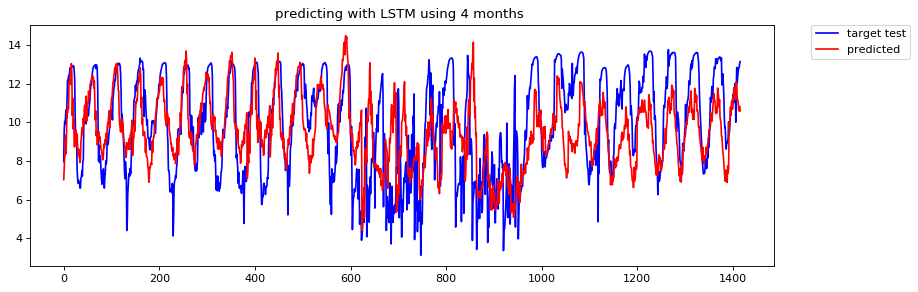

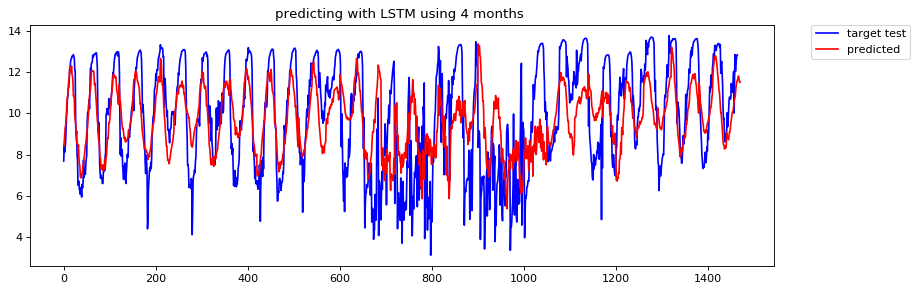

('mean_squared_error  LSTM = ', 70.422628764691325)
Epoch 1/10
6398/6398 [==============================] - 3s - loss: 0.1635     
Epoch 2/10
6398/6398 [==============================] - 0s - loss: 0.0327     
Epoch 3/10
6398/6398 [==============================] - 0s - loss: 0.0164     
Epoch 4/10
6398/6398 [==============================] - 0s - loss: 0.0107     
Epoch 5/10
6398/6398 [==============================] - 0s - loss: 0.0085     
Epoch 6/10
6398/6398 [==============================] - 0s - loss: 0.0072     
Epoch 7/10
6398/6398 [==============================] - 0s - loss: 0.0064     
Epoch 8/10
6398/6398 [==============================] - 0s - loss: 0.0059     
Epoch 9/10
6398/6398 [==============================] - 0s - loss: 0.0056     
Epoch 10/10
6398/6398 [==============================] - 0s - loss: 0.0052     
lstm
('mean_squared_error  LSTM = ', 13.493411944847848)


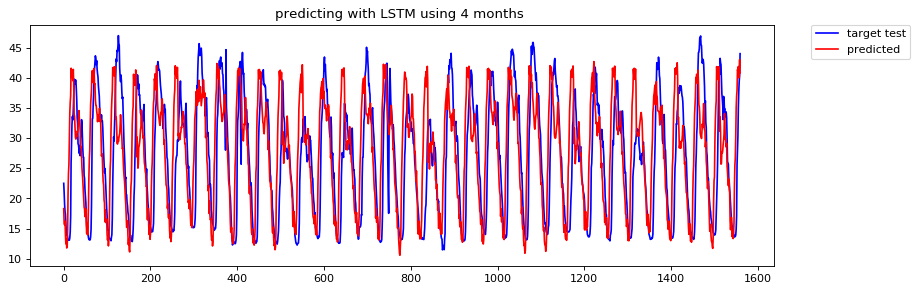

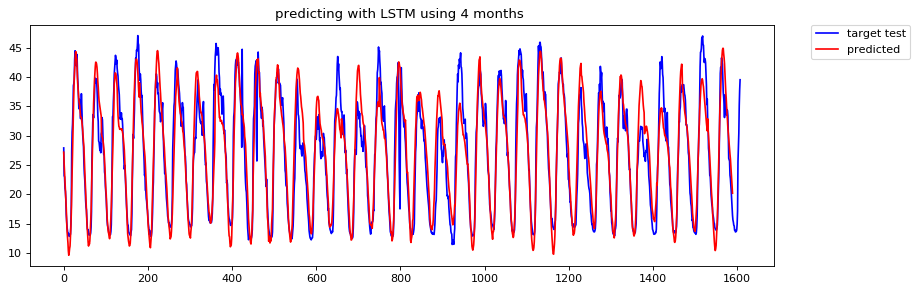

('mean_squared_error  LSTM = ', 3.4065872203171108)
Epoch 1/10
6285/6285 [==============================] - 3s - loss: 0.5541     
Epoch 2/10
6285/6285 [==============================] - 0s - loss: 0.0414     
Epoch 3/10
6285/6285 [==============================] - 0s - loss: 0.0307     
Epoch 4/10
6285/6285 [==============================] - 0s - loss: 0.0234     
Epoch 5/10
6285/6285 [==============================] - 0s - loss: 0.0175     
Epoch 6/10
6285/6285 [==============================] - 0s - loss: 0.0131     
Epoch 7/10
6285/6285 [==============================] - 0s - loss: 0.0102     - ETA: 0s - loss: 0.0
Epoch 8/10
6285/6285 [==============================] - 0s - loss: 0.0085     
Epoch 9/10
6285/6285 [==============================] - 0s - loss: 0.0076     
Epoch 10/10
6285/6285 [==============================] - 0s - loss: 0.0070     
lstm
('mean_squared_error  LSTM = ', 2.4666075144064949)


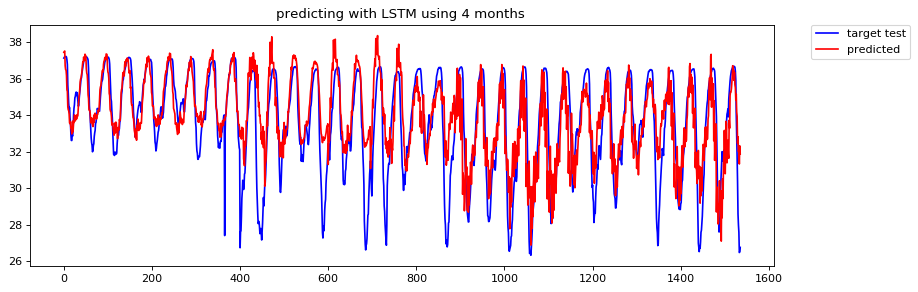

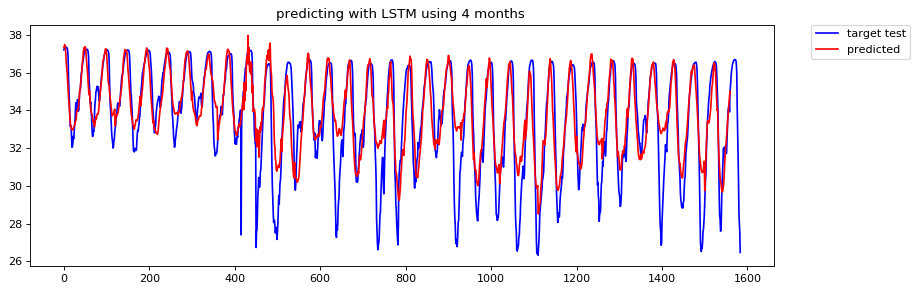

In [4]:
look_back    = 48
pred_horizon = 24
lstm_seq2seq, lstm_retro = [],[]

for i in range(0, len(dataframes)):
    ###############################
    ###### seq2seq approach #######
    ###############################
    scaler = MinMaxScaler(feature_range=(0, 1))
    # normalize the dataset
    datasetLstmSeq2seq = scaler.fit_transform(dataframes[i])

    trainX,trainY,testX,testY = create_dataset_seq2seq(datasetLstmSeq2seq,look_back,pred_horizon)
    
    trainXlstm = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testXlstm = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    model = train_seqtoseq_lstm(trainXlstm, trainY,pred_horizon)
    forecast_LSTM = model.predict(testXlstm)
    
    # rescaling back to initial dimension
    forecast_LSTM = scaler.inverse_transform(forecast_LSTM)
    testY = scaler.inverse_transform(testY)
    
    forecast_LSTM = forecast_LSTM.ravel()[:len(testY)]
    err = mean_squared_error(testY,forecast_LSTM)
    print("mean_squared_error  LSTM = ",err)
    lstm_seq2seq.append(err)
    ###############################
    ##### recursive approach ######
    ###############################
    # normalize the dataset
    datasetLstm = scaler.fit_transform(dataframes[i])
    train_data_lstm, test_data_lstm, y_seq_lstm = generate_datasets(datasetLstm,look_back=look_back, pred_horizon=pred_horizon)
    
    trainXlstm, trainYlstm = train_data_lstm[0], train_data_lstm[1]
    testXlstm, testYlstm   = test_data_lstm[0], test_data_lstm[1]
    # reshape input to be [samples, time steps, features]
    trainXlstm = np.reshape(trainXlstm, (trainXlstm.shape[0], 1, trainXlstm.shape[1]))
    testXlstm = np.reshape(testXlstm, (testXlstm.shape[0], 1, testXlstm.shape[1]))
    
    model = Sequential()
    model.add(LSTM(10, input_dim=48))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainXlstm, trainYlstm, nb_epoch=10, batch_size=128, verbose=1)
    
    print("lstm")
    forecast_LSTM_recursive = general_forecasting(testXlstm, model,method='lstm', strategy_approach='sliding_windows', slidding_window_len=30)

    # rescaling back to initial dimension
    forecast_LSTM_recursive = scaler.inverse_transform(forecast_LSTM_recursive)
    y_seq_lstm = scaler.inverse_transform(y_seq_lstm)
    if len(y_seq_lstm) > len(forecast_LSTM_recursive):
        err = mean_squared_error(y_seq_lstm[:len(forecast_LSTM_recursive)],forecast_LSTM_recursive)
        print("mean_squared_error  LSTM = ",err)
        lstm_retro.append(err)
    else:
        err = mean_squared_error(y_seq_lstm,forecast_LSTM_recursive[:len(y_seq_lstm)])
        print("mean_squared_error  LSTM = ",err)
        lstm_retro.append(err)
    
    #plotting lstm results
    testPredictPlot = np.empty((int(dataframes[i].shape[0])))
    testPredictPlot[:] = np.nan
    testPredictPlot = forecast_LSTM

    plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(testY,color='b',label='target test')
    plt.plot(testPredictPlot, color='r', label='predicted')
    plt.title('predicting with LSTM using 4 months ')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    #plotting lstm results
    testPredictPlot = np.empty((int(newV.shape[0])))
    testPredictPlot[:] = np.nan
    testPredictPlot = forecast_LSTM_recursive

    plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(y_seq_lstm,color='b',label='target test')
    plt.plot(testPredictPlot, color='r', label='predicted')
    plt.title('predicting with LSTM using 4 months ')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

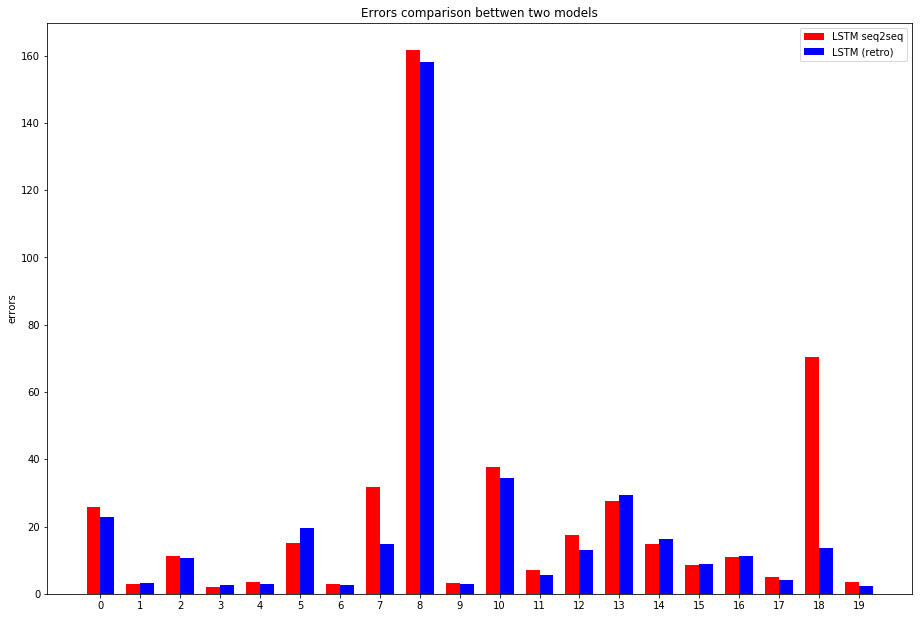

In [10]:
N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 10.5)
rects1 = ax.bar(ind, lstm_seq2seq, width, color='r')


rects2 = ax.bar(ind + width, lstm_retro, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('errors')
ax.set_title('Errors comparison bettwen two models')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(np.arange(20))

ax.legend((rects1[0], rects2[0]), ('LSTM seq2seq', 'LSTM (retro)'))

plt.show()